In [1]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import nltk as N

In [17]:
N.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
from nltk.corpus import stopwords as S

In [23]:
N.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.tokenize import word_tokenize as WT

In [6]:
from collections import Counter as C

In [8]:
from wordcloud import WordCloud as WC

In [9]:
import pandas as pnds

In [35]:
import matplotlib.pyplot as plot

In [12]:
#Loading the twitter data set into a dataframe named as myTwitterData
myTwitterData = pnds.read_csv("/content/Corona_NLP_test.csv")

In [18]:
# Converting the text corpus into tokens
myTwitterData["tokens"] = myTwitterData["OriginalTweet"].apply(WT)

In [26]:
# Performing stop word removal
stopWords = set(S.words("english"))

In [28]:
print(stopWords)

{'up', "weren't", 'ourselves', 'on', 'mightn', 'itself', 'aren', 'couldn', "it's", "you'd", 'themselves', 'each', "didn't", 'mustn', "shouldn't", 'whom', 'but', 'are', 'through', 'then', 'our', 'was', 'out', 'having', 'into', 'me', 'most', 'theirs', 'were', 'no', 'just', 'only', 'above', 'there', 'now', 'during', 're', 'any', "wasn't", 'further', 'is', 'about', "you'll", 'ours', 'ma', 'of', "wouldn't", 've', 'the', 'where', 'too', 'doesn', "that'll", 'such', "haven't", 'yourselves', 'her', 'a', 'their', 'my', 'some', 'we', 'both', 'down', 'himself', 'nor', 'be', "you've", 'until', 'below', 'herself', 'has', 'very', 'because', 'i', 'once', 'he', 'don', 'off', 'over', 'shouldn', 'wasn', 'which', 's', 'with', "doesn't", 'in', 'will', 'o', 'how', 'am', 'same', 'doing', "should've", 't', 'y', 'here', 'hasn', 'those', 'myself', 'that', 'shan', 'did', 'and', 'or', 'while', "couldn't", 'haven', 'needn', "won't", "aren't", 'should', 'these', 'by', 'him', 'them', "don't", "mightn't", 'against', 

In [27]:
myTwitterData["filtered_tokens"] = myTwitterData["tokens"].apply(lambda x: [word for word in x if word.lower() not in stopWords])


In [29]:
print(myTwitterData["filtered_tokens"])

0       [TRENDING, :, New, Yorkers, encounter, empty, ...
1       [could, n't, find, hand, sanitizer, Fred, Meye...
2       [Find, protect, loved, ones, #, coronavirus, ....
3       [#, Panic, buying, hits, #, NewYork, City, anx...
4       [#, toiletpaper, #, dunnypaper, #, coronavirus...
                              ...                        
3793    [Meanwhile, Supermarket, Israel, --, People, d...
3794    [panic, buy, lot, non-perishable, items, ?, EC...
3795    [Asst, Prof, Economics, @, cconces, @, NBCPhil...
3796    [Gov, need, somethings, instead, biar, je, rak...
3797    [@, ForestandPaper, members, committed, safety...
Name: filtered_tokens, Length: 3798, dtype: object


In [30]:
# Counting word frequencies
wordCounts = C([word for tokens in myTwitterData["filtered_tokens"] for word in tokens])

In [31]:
print(wordCounts)

Counter({'#': 7857, '.': 4866, ',': 3528, '?': 2597, ':': 2413, 'https': 1824, 'Covid_19': 1453, '@': 1242, 'food': 1201, 'coronavirus': 1194, 'store': 974, '!': 932, 'grocery': 760, 'people': 681, 'stock': 680, ';': 625, 'amp': 610, '&': 578, 'shopping': 501, 'supermarket': 464, 'online': 452, 'panic': 423, "'s": 407, 'prices': 405, 'COVID-19': 398, 'need': 349, "n't": 344, ')': 340, 'paper': 339, 'toilet': 330, 'like': 314, '...': 311, '-': 308, 'get': 300, '(': 276, 'buying': 276, 'COVID19': 261, 'go': 245, '19': 244, 'going': 242, 'local': 237, 'Coronavirus': 236, 'CoronavirusPandemic': 218, 'time': 216, 'home': 215, 'shelves': 202, 'work': 194, 'retail': 193, 'buy': 188, 'COVID': 184, 'stores': 183, "''": 176, 'due': 175, 'COVID2019': 175, 'help': 174, 'today': 172, '$': 165, '``': 162, 'supplies': 160, 'us': 160, 'CoronaOutbreak': 158, 'everyone': 153, 'demand': 148, 'consumer': 140, '2': 138, 'pandemic': 136, 'coronapocalypse': 135, 'would': 133, 'one': 130, 'virus': 127, 'hand'

In [42]:
# Creating a word cloud
wordCloud = WC(width=900, height=900, background_color="white").generate_from_frequencies(wordCounts)

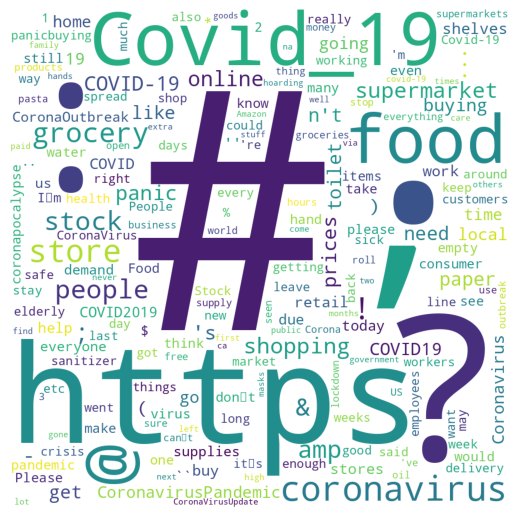

In [43]:
# Displaying the word cloud using matplotlib
plot.figure(figsize=(5,5), facecolor=None)
plot.imshow(wordCloud)
plot.axis("off")
plot.tight_layout(pad=0)
plot.show()

In [45]:
# Saving the word cloud as a PNG file
wordCloud.to_file("/content/wordcloud.png")